In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = '/Users/m.mughees/Desktop/2025-IEEE_SciVis-Contest-Mughees/data/Dataset_VisContest_Rapid_Alloy_development_v3.txt'

# Try reading with ISO-8859-1 encoding (Latin-1), which handles many special characters
try:
    df = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
except Exception as e:
    print("Tab delimiter failed. Trying semicolon with ISO-8859-1...")
    df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

# Show result
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (324632, 137)


,KS1295[%],6082[%],2024[%],bat-box[%],3003[%],4032[%],Al,Si,Cu,Ni,...,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136
0,0.0,0.0,0.0,0.0,0.0,100.0,83.67500,12.25000,0.900000,1.3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,3.3,96.7,84.11885,11.86555,0.874425,1.2571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,6.6,93.4,84.56270,11.48110,0.848850,1.2142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,9.9,90.1,85.00655,11.09665,0.823275,1.1713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,13.2,86.8,85.45040,10.71220,0.797700,1.1284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Define feature groups
composition_cols = ['Al', 'Si', 'Cu', 'Ni', 'Mg', 'Mn', 'Fe', 'Cr', 'Ti', 'Zr', 'V', 'Zn']
target_cols = ['YS(MPa)', 'CSC', 'Therm. conductivity(W/(mK))', 'Density(g/cm3)']

In [12]:
X = df[composition_cols].dropna()

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['YS(MPa)'] = df.loc[X.index, 'YS(MPa)']
pca_df['Therm.conductivity(W/(mK))'] = df.loc[X.index, 'Therm.conductivity(W/(mK))']
pca_df['CSC'] = df.loc[X.index, 'CSC']


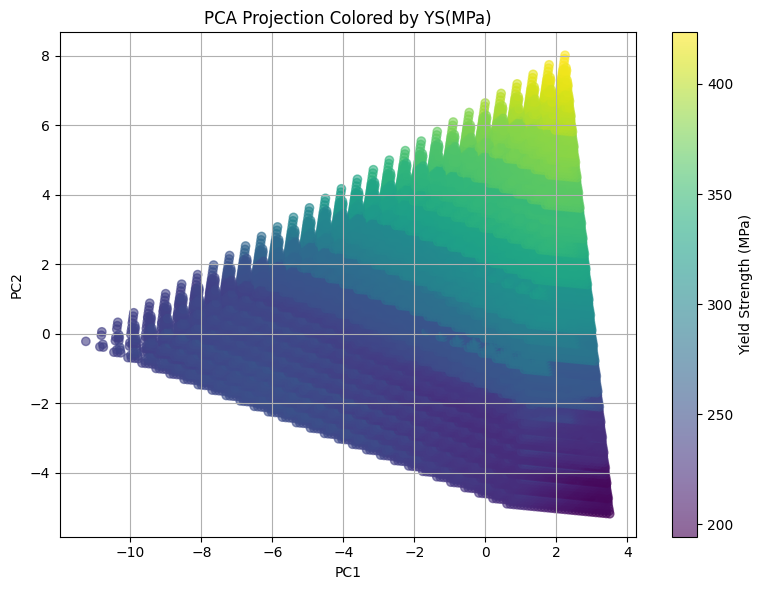

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['YS(MPa)'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Yield Strength (MPa)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Colored by YS(MPa)')
plt.grid(True)
plt.tight_layout()
plt.show()

## YS is Yield Strength, it tells us how much stress a material can handle before it deforms permanently. (Very imporant for aerospace and automotive parts)
### The yellowish areas are where YS peaks and that is where I will be looking into further for stregth-critical applications.
#### Next step includes looking into which compositions land in this region - those will be m high performing alloy candidates.

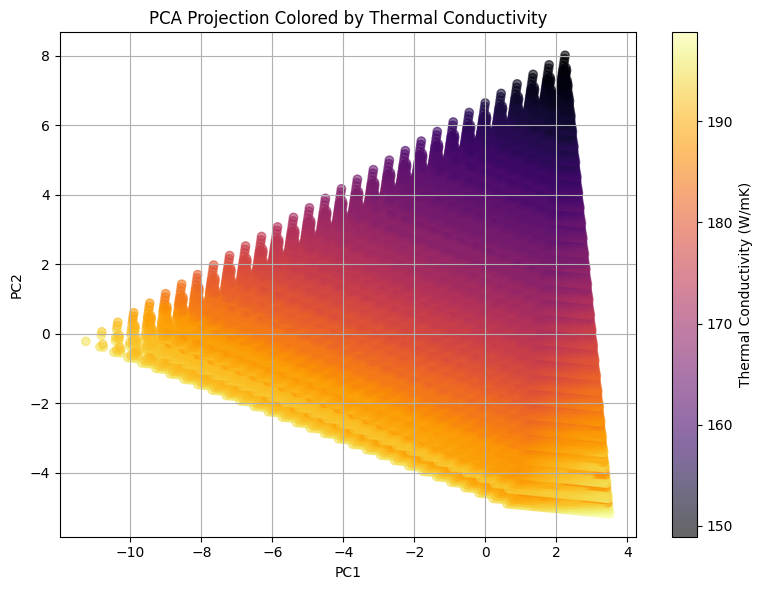

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['Therm.conductivity(W/(mK))'],
    cmap='inferno',
    alpha=0.6
)
plt.colorbar(scatter, label='Thermal Conductivity (W/mK)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Colored by Thermal Conductivity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Thermal Conductivity shows ho well heat flows through the material.
### High themral conductivity is the bright yellow area athe bootom left of the triangle
### keep in ming that the best thermal alloys might not be the best.

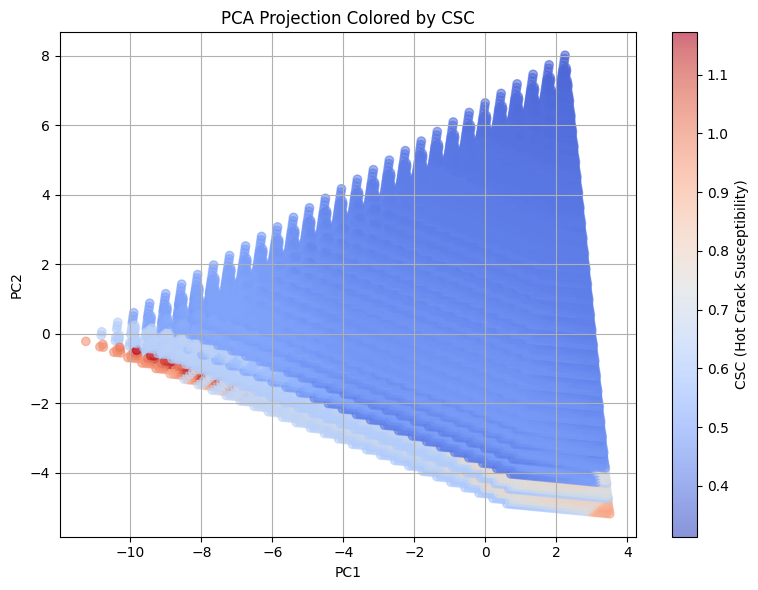

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['CSC'],
    cmap='coolwarm',
    alpha=0.6
)
plt.colorbar(scatter, label='CSC (Hot Crack Susceptibility)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Colored by CSC')
plt.grid(True)
plt.tight_layout()
plt.show()


## CSC measures how likely the alloy is to form cracks while solidifying - lower the better for reliable manufacturing and casting
### most of the graph is blue which means low CSC which is good excpet for the bottom left




### 🎯 Summary: What These Three Together Tell You

| Region of PCA Plot | YS         | Thermal Conductivity | CSC (Crack Risk) | Good for...                                           |
|--------------------|------------|----------------------|------------------|--------------------------------------------------------|
| **Top-Right**      | ✅ High    | ❌ Low               | ✅ Safe          | Aerospace, automotive structural parts                |
| **Bottom-Left**    | ❌ Low     | ✅ High              | ❌ Risky         | Thermal use (e.g., heat sinks) but risky to manufacture |
| **Middle Band**    | ⚖️ Tradeoff | ⚖️ Medium            | ⚖️ Balanced      | Balanced applications like e-mobility chassis, consumer electronics |


In [18]:
# ✅ Select valid microstructure-related columns (Vf_, T_, delta_T)
microstructure_cols = [col for col in df.columns if col.startswith(('Vf_', 'T_', 'delta_T'))]
microstructure_cols = [col for col in microstructure_cols if col in df.columns]  # Ensure they exist

# ✅ Drop rows with NaNs only in selected microstructure columns
X_micro = df[microstructure_cols].dropna()

# ✅ Check if any rows remain
if not X_micro.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_micro)

    # Run PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create PCA DataFrame
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_micro.index)
    pca_df['YS(MPa)'] = df.loc[X_micro.index, 'YS(MPa)']
    pca_df['CSC'] = df.loc[X_micro.index, 'CSC']
else:
    print("⚠️ No rows with complete microstructure data. Consider imputing missing values or selecting fewer columns.")

⚠️ No rows with complete microstructure data. Consider imputing missing values or selecting fewer columns.


In [ ]:
# Plot colored by YS
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='YS(MPa)', palette='coolwarm')
plt.title('PCA of Microstructure Features (Colored by Yield Strength)')
plt.tight_layout()
plt.show()

In [ ]:
# Plot colored by CSC
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='CSC', palette='viridis')
plt.title('PCA of Microstructure Features (Colored by Hot Crack Sensitivity)')
plt.tight_layout()
plt.show()

In [ ]:
# Select all numeric columns (excluding targets for now)
exclude_cols = ['YS(MPa)', 'CSC', 'Therm. conductivity(W/(mK))']
input_cols = df.select_dtypes(include='number').columns.difference(exclude_cols)

# Drop NaNs and scale
X_all = df[input_cols].dropna()
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

# PCA
pca = PCA(n_components=2)
X_pca_all = pca.fit_transform(X_scaled_all)

# DataFrame
pca_df_all = pd.DataFrame(X_pca_all, columns=['PC1', 'PC2'], index=X_all.index)
pca_df_all['YS(MPa)'] = df.loc[X_all.index, 'YS(MPa)']

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df_all, x='PC1', y='PC2', hue='YS(MPa)', palette='coolwarm')
plt.title('PCA on All Features (Colored by Yield Strength)')
plt.tight_layout()
plt.show()